In [ ]:
import math
import random

import matplotlib.pyplot as plt

In [62]:
def get_nodes_on_circle(n, radius=5):
    assert n>1
    nodes = []
    for i in range(n):
        angle = 2 * math.pi * i / n
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        nodes.append((x, y))
    return nodes

def get_random_egdes_directed(n_nodes, n_edges):
    assert n_nodes>1 and n_edges <=2*n_nodes and n_edges>0
    edges = []
    while len(edges) <= n_edges:
        edge = random.sample(range(n_nodes), 2)
        if edge not in edges:
            edges.append(edge)
    return edges

def calculate_vertex_degrees(n,edges):
    degrees={i:[0,0] for i in range(n)}
    for i,j in edges:
        degrees[i][0] += 1
        degrees[j][1] += 1
    print("Vertex degrees - in, out:")
    print(degrees)

def draw_graph(nodes, edges, title, edge_color='gray', node_color='blue', directed=False):
    for i, j in edges:
        xs = [nodes[i][0], nodes[j][0]]
        ys = [nodes[i][1], nodes[j][1]]
        if not directed:
            plt.plot(xs, ys, color=edge_color)
        else:
            plt.arrow(xs[0], ys[0], xs[1] - xs[0], ys[1] - ys[0], head_width=0.2, head_length=0.5, fc=edge_color,ec=edge_color, length_includes_head=True)

    plt.scatter(*zip(*nodes), color=node_color, )
    plt.title(title)
    plt.axis('equal')
    plt.show()

In [3]:
def draw_saquare_lattice(n, spacing=1):
    assert n>1
    nodes = []
    edges = []
    for i in range(n):
        for j in range(n):
            idx = i * n + j
            nodes.append((j * spacing, i * spacing))
            if j < n - 1:
                edges.append((idx, idx + 1))
            if i < n - 1:
                edges.append((idx, idx + n))

    draw_graph(nodes, edges, title='Square lattice')


def draw_chain(n, radius=5):
    assert n>1
    nodes = get_nodes_on_circle(n, radius=radius)
    edges = [(i, i + 1) for i in range(n - 1)]
    edges.append((n - 1, 0))
    draw_graph(nodes, edges, title='Chain graph')


def draw_compete_graph(n):
    assert n>1
    nodes = get_nodes_on_circle(n)
    edges = [(i, j) for i in range(n) for j in range(n)]
    draw_graph(nodes, edges, title='Compete graph')

def draw_directed_graph(n, edges):
    assert n>1
    nodes = get_nodes_on_circle(n)
    draw_graph(nodes, edges, title='Directed graph', directed=True)


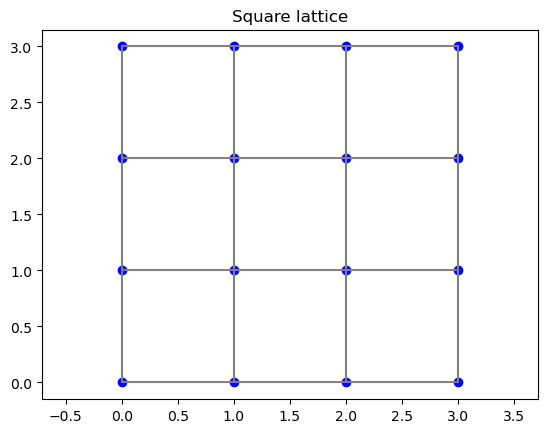

In [4]:
draw_saquare_lattice(4)

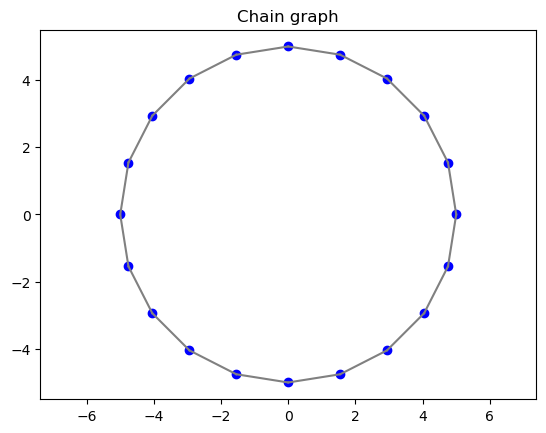

In [5]:
draw_chain(20)

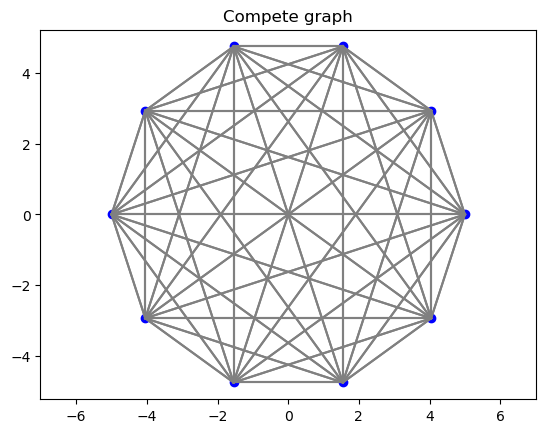

In [65]:
draw_compete_graph(10)

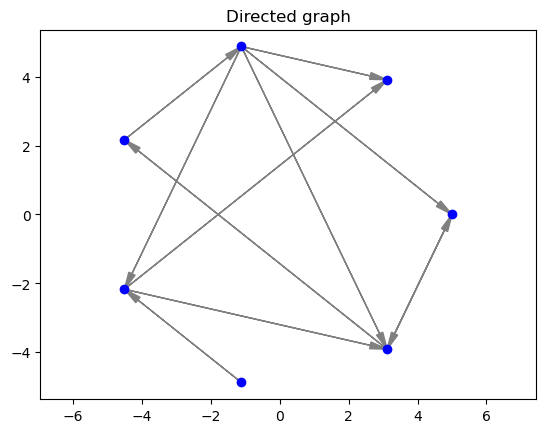

edges: [[0, 6], [4, 1], [2, 1], [6, 3], [3, 2], [2, 0], [2, 6], [6, 0], [5, 4], [2, 4], [4, 6]]
Vertex degrees - in, out:
{0: [1, 2], 1: [0, 2], 2: [4, 1], 3: [1, 1], 4: [2, 2], 5: [1, 0], 6: [2, 3]}


In [64]:
n=7
edges = get_random_egdes_directed(n, 10)
draw_directed_graph(n, edges)
print("edges:", edges)
calculate_vertex_degrees(n,edges)